In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [29]:
dados = pd.read_csv("q3.csv", index_col=0, sep=';')
dados.head()

,expectativa_de_vida,educacao,pib,estabilidade_politica
pais,,,,
Reino Unido,0.88,0.99,0.91,1.10
Austrália,0.90,0.99,0.93,1.26
Canadá,0.90,0.98,0.94,1.24
Estados Unidos,0.87,0.98,0.97,1.18
Japão,0.93,0.93,0.93,1.20


In [30]:
def calc_centroide(congl):
  return np.mean(congl, axis=0)

def distConglomerado(c0, c1):
  centroide_0 = calc_centroide(c0)
  centroide_1 = calc_centroide(c1)

  fator = (c0.shape[0]*c1.shape[0])/(c0.shape[0]+c1.shape[0])

  dist = centroide_1 - centroide_0 

  return fator * (dist @ dist)

def calcR2(data, ind):

  m = calc_centroide(data)

  SSB = 0.0
  SST = 0.0

  for i in ind:
    cluster = data[i, :]
    
    ni, _ = cluster.shape
    mi = calc_centroide(cluster)

    SSB += ni * ((mi - m) @ (mi - m))

    for j in range(ni):
      SST += (cluster[j, :] - mi).T @ (cluster[j, :] - mi)

  return SSB/SST

def calcPseudoT2(data, cluster0, cluster1):
  m0 = calc_centroide(cluster0)
  m1 = calc_centroide(cluster1)

  sum1 = (cluster0 - m0).T @ (cluster0 - m0)
  sum2 = (cluster1 - m1).T @ (cluster1 - m1)

  B = distConglomerado(cluster0, cluster1)

  PST2 = B * (cluster0.shape[0] + cluster1.shape[0] - 1)

  PST2 /= (sum1 + sum2)

  return PST2


def concatCongl(C, i, j):
  C1 = C[i]
  C2 = C[j]
  if(i < j):
    del(C[j])
    del(C[i])
  else:
    del(C[i])
    del(C[j])

  C.append(C1 + C2)
  return C

In [32]:
ind = [[i,] for i in range(dados.shape[0])]
R2 = []
sim = np.zeros((len(ind), len(ind)))
ind_hist = []
matriz = dados.to_numpy()

while(len(ind) != 1):
  sim = np.zeros((len(ind), len(ind)))
  for i in range(len(ind)):
    for j in range(len(ind)):
      if(i == j):
        sim[i, j] = 100000
      else:
        dc = distConglomerado(matriz[ind[i], :], matriz[ind[j], :])
        sim[i, j] = dc
     

  i, j = np.unravel_index(sim.argmin(), sim.shape)

  ind = concatCongl(ind, i, j)
    
  print(ind, "\n\n")


  R2 += [calcR2(matriz, ind), ]
  ind_hist.append(ind.copy())


[[0], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [1, 2]] 


[[3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [1, 2], [0, 5]] 


[[6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [1, 2], [0, 5], [3, 4]] 


[[6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [0, 5], [1, 2, 3, 4]] 


[[6], [7], [8], [9], [10], [12], [13], [14], [15], [16], [17], [18], [19], [0, 5], [1, 2, 3, 4], [11, 20]] 


[[6], [7], [9], [10], [12], [13], [14], [15], [16], [17], [18], [19], [1, 2, 3, 4], [11, 20], [8, 0, 5]] 


[[6], [7], [9], [10], [12], [13], [14], [16], [17], [19], [1, 2, 3, 4], [11, 20], [8, 0, 5], [15, 18]] 


[[6], [9], [10], [12], [13], [14], [16], [17], [19], [1, 2, 3, 4], [8, 0, 5], [15, 18], [7, 11, 20]] 


[[9], [10], [12], [13], [14], [16], [17], [19], [8, 0, 5], [15, 18], [7, 11, 20], [6, 1, 2, 3, 4]] 


[[10], [12

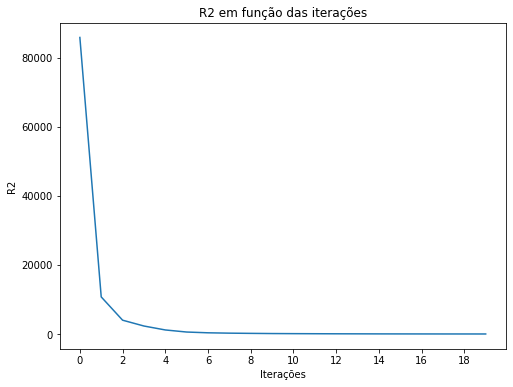

In [33]:
plt.figure(figsize=(8, 6))

plt.plot(np.arange(0, len(R2), 1), R2)
plt.ylabel('R2')
plt.xlabel('Iterações')
plt.xticks(np.arange(0, len(R2), 2))
plt.title("R2 em função das iterações")
plt.show()

In [34]:
ind_i = 0

for i in range(1, len(R2)):
  if(abs(R2[i]-R2[i-1]) < 10):
    ind_i = i
    break;
    
ind_i

15

In [36]:
R2

[85883.60317460334,
 10734.575396825383,
 3993.6327057954963,
 2304.62693086183,
 1163.5369921980093,
 562.0751619533262,
 339.54914795525,
 236.45071148803572,
 174.80890428317986,
 123.10870547541441,
 94.10913223307557,
 71.58364941863782,
 52.99000671042162,
 40.052844422744755,
 25.92358887305151,
 17.205125918902567,
 11.036944652541296,
 5.610283425310471,
 1.5959483253603552,
 1.0674121083898927e-32]

In [37]:
for cong in ind_hist[ind_i]:
  print(calc_centroide(matriz[cong, :]))

[0.88375 0.95375 0.9075  1.185  ]
[ 0.76   0.84   0.66  -1.115]
[0.766 0.814 0.674 0.338]
[ 0.33666667  0.42333333  0.38333333 -1.53333333]
[ 0.34        0.36333333  0.37666667 -0.34333333]


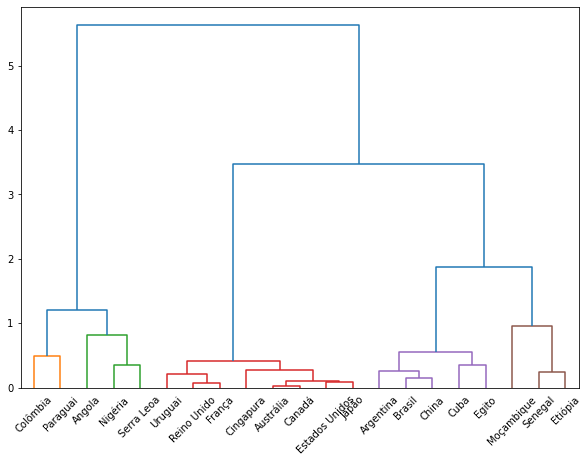

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(matriz, 'ward')

fig = plt.figure(figsize=(10,7))

dendrogram(Z, color_threshold=1, labels=dados.index)

plt.show() 